<a href="https://www.kaggle.com/code/subhajeetdas/handful-guide-for-hyper-parameter-tuning?scriptVersionId=168462408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

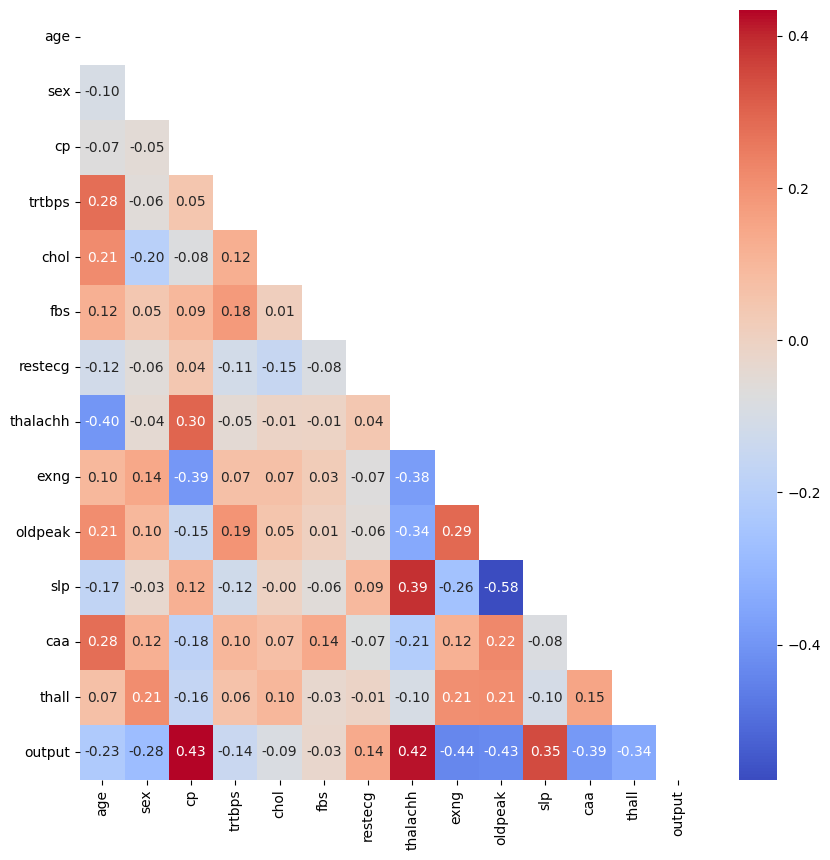

In [4]:
plt.figure(figsize = (10, 10))
mask = np.triu(df.corr())

sns.heatmap(df.corr(), mask = mask, annot = True, fmt = '.2f', cmap = 'coolwarm')

In [5]:
x = df.drop('output', axis =1)
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y = df.output.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [8]:
len(x_train)

227

In [9]:
len(x_test)

76

In [10]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
y_pred_tr = model_xgb.predict(x_train)

In [12]:
y_pred = model_xgb.predict(x_test)

In [13]:
print(f"Train Accuracy = {accuracy_score(y_train, y_pred_tr)}")
print(f"Test Accuracy = {accuracy_score(y_test, y_pred)}")

Train Accuracy = 1.0
Test Accuracy = 0.75


In [14]:
model_xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [15]:
base = XGBClassifier()

In [16]:
parameter = {"max_depth" : [1, 3, 5, 7], 
             "min_child_weight" : [1, 3, 5], 
             "n_jobs" : [-1, 1], 
             "base_score" : [0.1, 0.3, 0.5, 0.7], 
             "booster" : ['gbtree', 'dart'], 
             "n_estimators" : [100, 200, 500, 700], 
             "learning_rate" : [0.01, 0.1]}

In [17]:
random = RandomizedSearchCV(base, param_distributions = parameter, n_iter = 100, scoring = 'accuracy', cv = 5, verbose = 2)

In [18]:
random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END base_score=0.7, booster=gbtree, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.1s
[CV] END base_score=0.7, booster=gbtree, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.1s
[CV] END base_score=0.7, booster=gbtree, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.1s
[CV] END base_score=0.7, booster=gbtree, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.1s
[CV] END base_score=0.7, booster=gbtree, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.1s
[CV] END base_score=0.7, booster=dart, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=500, n_jobs=1; total time=   6.1s
[CV] END base_score=0.7, booster=dart, learning_rate=0.01, max_depth=1, min_child_weight=1, n

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'base_score': [0.1, 0.3, 0.5, 0.7],
                                        'booster': ['gbtree', 'dart'],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [1, 3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 500, 700],
                                        'n_jobs': [-1, 1]},
                   scoring='accuracy', verbose=2)

In [19]:
random.best_params_

{'n_jobs': -1,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.1,
 'booster': 'dart',
 'base_score': 0.5}

In [20]:
best = random.best_estimator_

In [21]:
y_best_tr = best.predict(x_train)
y_best = best.predict(x_test)
print(f"Train Accuracy = {accuracy_score(y_train, y_best_tr)}")
print(f'Test Accuracy = {accuracy_score(y_test, y_best)}')

Train Accuracy = 1.0
Test Accuracy = 0.7368421052631579


In [22]:
grid = GridSearchCV(base, param_grid = parameter, scoring = 'accuracy', n_jobs = -1, verbose = 2, return_train_score = True, cv = 5)

In [23]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100, n_jobs=-1; total time=   0.1s
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.0s
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=100, n_jobs=1; total time=   0.0s
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=200, n_jobs=-1; total time=   0.1s
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=200, n_jobs=1; total time=   0.1s
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=500, n_jobs=-1; total time=   0.2s
[CV] END base_score=0.1, booster=gbtree, learning_rate=0.01, max_depth=1, min_child_we

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.1, 0.3, 0.5, 0.7],
                         'booster': ['gbtree', 'dart'],
                         'learning_rate': [0.01, 0.1],
                         'max_depth': [1, 3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500, 700],
                         'n_jobs': [-1, 1]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [24]:
grid.best_params_

{'base_score': 0.5,
 'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'n_jobs': -1}

In [25]:
grid.best_score_

0.8683091787439615

In [26]:
model_grid = grid.best_estimator_

In [27]:
y_grid = model_grid.predict(x_test)

In [28]:
print(f'Test Accuracy = {accuracy_score(y_test, y_grid)}')

Test Accuracy = 0.7368421052631579
